### **1-1. 공통**

In [3]:
# [데이터 출처] https://www.kaggle.com/competitions/titanic
import pandas as pd 
titanic = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/1-1_titanic.csv')
print(titanic.head(2))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# feature 삭제
titanic = titanic.drop(['PassengerId', 'Cabin'], axis=1)

# 질적변수의 데이터 타입을 category로 변경
qual = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']
quan = ['Age', 'SibSp', 'Parch', 'Fare']
for col in qual:
    titanic[col] = titanic[col].astype('category')
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    category
 8   Fare      891 non-null    float64 
 9   Embarked  889 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 96.2 KB
None


#### 기술통계

In [7]:
print(titanic.describe(include=['float64','int64']))

              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200


In [9]:
print(titanic.describe(include=['category']))

        Survived  Pclass                 Name   Sex Ticket Embarked
count        891     891                  891   891    891      889
unique         2       3                  891     2    681        3
top            0       3  Abbing, Mr. Anthony  male   1601        S
freq         549     491                    1   577      7      644


### **1-2. 질적변수**
#### 도수분포표, 상대도수분포표

In [12]:
freq = pd.DataFrame (titanic['Survived'].value_counts())
print(freq)

          count
Survived       
0           549
1           342


In [15]:
# 상대도수분포표 추가
freq['상대도수'] = titanic['Survived'].value_counts(normalize=True)
freq = freq.rename(columns={'count':'도수'}) #'count'를 '도수'로 컬럼명 변경
print(freq)

           도수      상대도수
Survived               
0         549  0.616162
1         342  0.383838


#### 상관계수: 스피어만 순위상관계수, 켄달의 타우

In [21]:
from scipy.stats import spearmanr, kendalltau

corr, p = spearmanr (titanic['Survived'],titanic['Pclass'])
print("스피어만 상관계수는 {:.3f}, p-value는 {:.3f}".format(corr, p))

corr2, p2 = kendalltau(titanic['Survived'], titanic['Pclass'])
print("켄달타우 상관계수는 %.3f, p-value는 %.3f" %(corr2, p2))
print(f"켄달타우 상관계수는 {corr2:.3f}, p-value는 {p2:.3f}")

스피어만 상관계수는 -0.340, p-value는 0.000
켄달타우 상관계수는 -0.324, p-value는 0.000
켄달타우 상관계수는 -0.324, p-value는 0.000


#### 질적변수 탐색 시각화

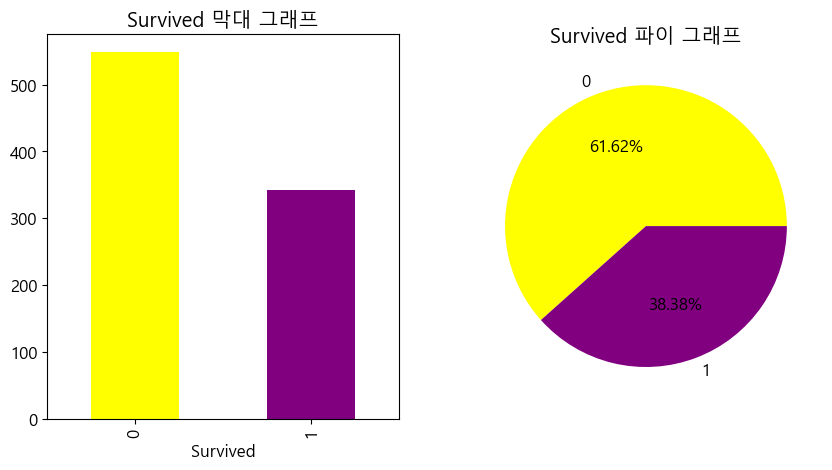

In [27]:
# plotting 환경 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 글꼴 경로를 지정합니다.
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 실제 경로로 대체

# 글꼴을 설정합니다.
font_name = fm.FontProperties(fname=font_path).get_name()

plt.rcParams["figure.figsize"] = (5, 5) # 그래프 크기
plt.rcParams["font.family"] = font_name # 글꼴
plt.rcParams["font.size"] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기
fig, ax = plt.subplots(1,2, figsize=(10, 5)) # 그래프 구성

# 막대 그래프
ax[0].set_title('Survived 막대 그래프')
freq['도수'].plot.bar(ax=ax[0], color=['yellow', 'purple'])

# 파이 그래프
ax[1].set_title('Survived 파이 그래프')
ax[1].pie(freq['도수'].values, labels=freq['도수'].index, 
          autopct="%.2f%%", colors=['yellow', 'purple'])
plt.show()

### **1-3. 양적변수**
#### 도수분포표, 상대도수분포표

In [40]:
# 계급의 개수를 지정하여 도수분포표 생성
result1 = pd.cut(titanic['Age'], bins=5)
freq1 = pd.DataFrame(result1.value_counts()).reset_index()

# 컬럼명을 변경하고, 계급 오름차순 정렬
freq1 = freq1.rename(columns={'Age':'계급', 'count':'도수'}).sort_values(by='계급')

# freq1의 상대도수 추가 (freq1의 각 도수를 전체 도수의 합으로 나누어 구함)
freq1['상대도수'] = freq1['도수'].apply(lambda x: x / freq1['도수'].sum())
print(freq1)


                 계급   도수      상대도수
2    (0.34, 16.336]  100  0.140056
0  (16.336, 32.252]  346  0.484594
1  (32.252, 48.168]  188  0.263305
3  (48.168, 64.084]   69  0.096639
4    (64.084, 80.0]   11  0.015406


(array([0.11223345, 0.38832772, 0.21099888, 0.07744108, 0.01234568]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

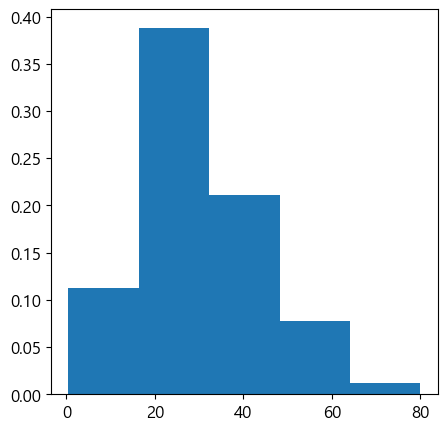

In [50]:
import numpy as np
plt.hist(titanic['Age'],bins=5, weights=np.ones_like(titanic['Age']) / len(titanic['Age']))

In [53]:
# 계급의 범위를 지정하여 도수분포표 생성
result2 = pd.cut(titanic['Age'], bins=[0, 20, 40, 60, float('inf')], right=False)
freq2 = pd.DataFrame(result2.value_counts()).reset_index()
freq2 = freq2.rename(columns={'Age':'계급', 'count':'도수'}).sort_values(by='계급')

# freq2의 상대도수 추가
freq2['상대도수'] = freq2['도수'].apply(lambda x: x / freq2['도수'].sum())
print(freq2)

             계급   도수      상대도수
1   [0.0, 20.0)  164  0.229692
0  [20.0, 40.0)  387  0.542017
2  [40.0, 60.0)  137  0.191877
3   [60.0, inf)   26  0.036415


#### 계산적/위치적 대푯값

In [54]:
from scipy.stats.mstats import gmean, hmean, tmean
import numpy as np

example = [1, 2, 3, 4, 5, 10]
print("산술평균: {:.2f}".format(np.mean(example)))
print("기하평균: {:.2f}".format(gmean(example)))
print("조화평균: {:.2f}".format(hmean(example)))

# 1이상 5이하의 범위를 벗어나는 값을 제외
print("절사평균: {:.2f}".format(tmean(example, (1,5))))

# 평방평균
qm = np.sqrt(np.mean(np.array(example)**2)) #list를 array로 변경한 후 계산
print("평방평균: {:.2f}".format(qm))

산술평균: 4.17
기하평균: 3.26
조화평균: 2.52
절사평균: 3.00
평방평균: 5.08


In [55]:
import numpy as np
print("중위수: ", titanic['Fare'].median())
print("최빈값: ", titanic['Fare'].mode()[0])
print("1사분위수: ", titanic['Fare'].quantile(q=0.25))
print("2사분위수: ", titanic['Fare'].quantile(q=0.5))
print("3사분위수: ", titanic['Fare'].quantile(q=0.75))
print("50백분위수: ", np.percentile(titanic['Fare'], 50)) 
print("75백분위수: ", np.percentile(titanic['Fare'], 75)) 

중위수:  14.4542
최빈값:  8.05
1사분위수:  7.9104
2사분위수:  14.4542
3사분위수:  31.0
50백분위수:  14.4542
75백분위수:  31.0


#### 절대적 산포도

In [56]:
print("범위: %.2f" %(titanic['Fare'].max() - titanic['Fare'].min()))

iqr = titanic['Fare'].quantile(0.75) - titanic['Fare'].quantile(0.25)
print("사분위범위: %.2f" %(iqr), "\n")

md = np.mean(np.abs(np.array(titanic['Fare']) - np.mean(titanic['Fare'])))
print("평균편차: %.2f" %(md))
print("사분편차: %.2f" %(iqr/2), "\n")

print("모분산: %.2f" %(titanic['Fare'].var(ddof=0)))
print("표본분산: %.2f" %(titanic['Fare'].var(ddof=1))) # 자유도 n-1을 의미 

print("모표준편차: %.2f" %(titanic['Fare'].std(ddof=0)))
print("표본표준편차: %.2f" %(titanic['Fare'].std(ddof=1)))

범위: 512.33
사분위범위: 23.09 

평균편차: 28.16
사분편차: 11.54 

모분산: 2466.67
표본분산: 2469.44
모표준편차: 49.67
표본표준편차: 49.69


#### 상대적 산포도

In [57]:
print("사분위편차계수: %.2f" %(iqr/2/titanic['Fare'].median()))
print("평균편차계수: %.2f" %(md/titanic['Fare'].mean()))
print("모집단 변동계수: %.2f" %(titanic['Fare'].std(ddof=0)/titanic['Fare'].mean()))
print("표본집단 변동계수: %.2f" %(titanic['Fare'].std(ddof=1)/titanic['Fare'].mean()))

사분위편차계수: 0.80
평균편차계수: 0.87
모집단 변동계수: 1.54
표본집단 변동계수: 1.54


#### 왜도, 첨도

In [58]:
# pandas
print("왜도: %.3f, 첨도: %.3f" %(titanic['Fare'].skew(), titanic['Fare'].kurt()))

# scipy
from scipy.stats import skew, kurtosis
ssF = skew(titanic['Fare'], bias=False)
skF = kurtosis(titanic['Fare'], bias=False)
ssT = skew(titanic['Fare'], bias=True)
skT = kurtosis(titanic['Fare'], bias=True)
print("왜도: %.3f(%.3f), 첨도: %.3f(%.3f)" %(ssF, ssT, skF, skT))

왜도: 4.787, 첨도: 33.398
왜도: 4.787(4.779), 첨도: 33.398(33.204)


#### 상관계수: 피어슨의 적률상관계수

In [59]:
from scipy.stats import pearsonr
# PassengerId, Cabin이 없는 titanic에서 추가로 Age의 결측치가 있는 행을 삭제
titanic = titanic.dropna(axis=0)
corr, p = pearsonr(titanic['Age'], titanic['Fare'])
print("피어슨 상관계수 {:.3f}, p-value {:.3f}".format(corr, p))

피어슨 상관계수 0.093, p-value 0.013


#### 양적변수 탐색 시각화

In [63]:
!pip install stemgraphic 

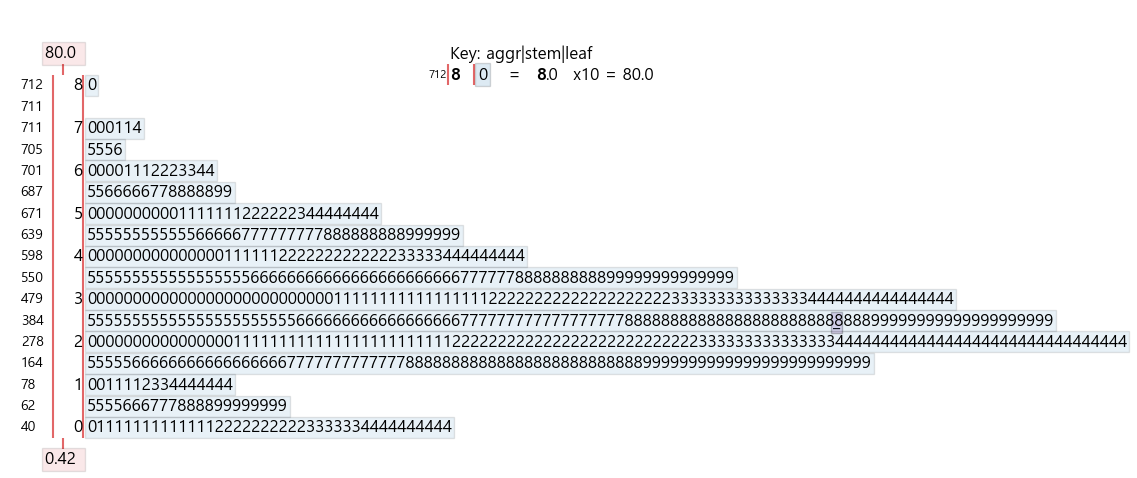

In [64]:
import stemgraphic
stemgraphic.stem_graphic (titanic['Age'])
plt.show()

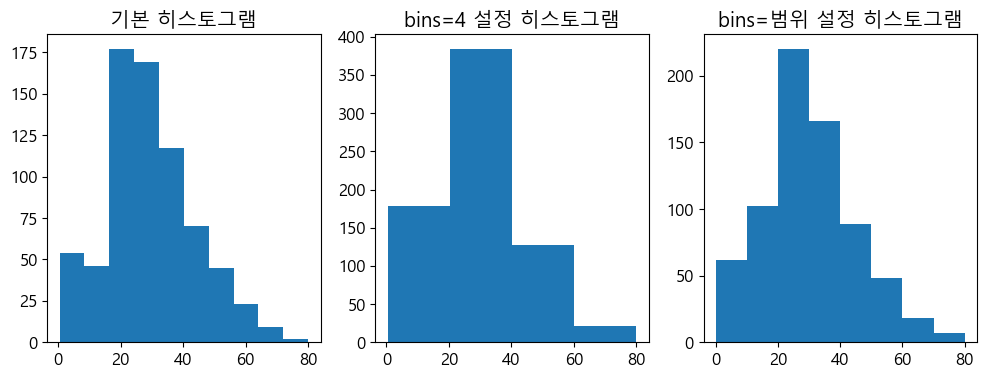

In [71]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].hist(titanic['Age'])
ax[0].set_title("기본 히스토그램")
ax[1].hist(titanic['Age'], bins=4)#bin number 설정
ax[1].set_title("bins=4 설정 히스토그램")
ax[2].hist(titanic['Age'], bins=[i for i in range(0,90,10)])#bin edges 설정
ax[2].set_title("bins=범위 설정 히스토그램")
plt.show()

[도수분포표]
          계급   도수  누적도수   계급값
4   (0, 10]   64    64   5.0
2  (10, 20]  115   179  15.0
0  (20, 30]  230   409  25.0
1  (30, 40]  154   563  35.0
3  (40, 50]   86   649  45.0
5  (50, 60]   42   691  55.0
6  (60, 70]   16   707  65.0
7  (70, 80]    5   712  75.0 



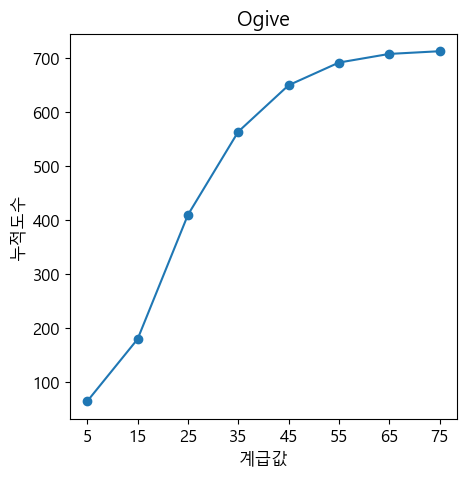

In [69]:
result1 = pd.cut(titanic['Age'], bins=[i for i in range(0,90,10)])
freq1 = pd.DataFrame(result1.value_counts()).reset_index()
freq1 = freq1.rename(columns={'Age':'계급', 'count':'도수'}).sort_values(by='계급')

freq1['누적도수'] = freq1['도수'].cumsum()
freq1['계급값'] = freq1['계급'].apply(lambda x: np.median ([x.left,x.right]))
print("[도수분포표]\n", freq1, "\n")

plt.plot(freq1['계급값'], freq1['누적도수'], marker='o')
plt.xticks(freq1['계급값'])
plt.ylabel('누적도수')
plt.xlabel('계급값')
plt.title("Ogive")
plt.show()

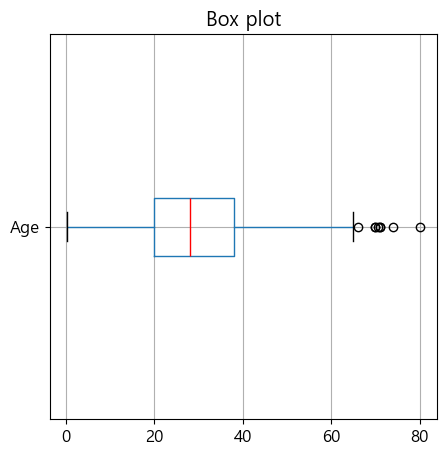

In [72]:
from matplotlib import pyplot as plt
# vert=False는 수평, True는 수직 상자그림, medianprops의 color는 중위수 색상
titanic[['Age']].boxplot(vert=False, medianprops={'color':'red'})
plt.title('Box plot')
plt.yticks(ticks=[1], labels=['Age'])
plt.show()

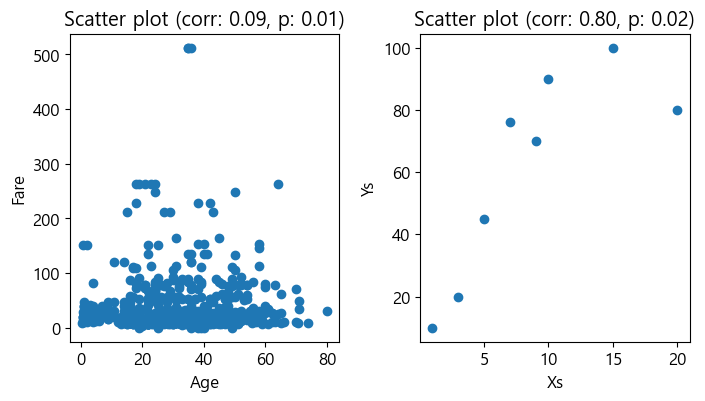

In [73]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
plt.subplots_adjust(wspace=0.3)

ax[0].scatter(titanic['Age'], titanic['Fare'])
ax[0].set_title('Scatter plot (corr: %.2f, p: %.2f)' %(pearsonr(titanic['Age'], titanic['Fare'])))
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Fare')

Xs = [1, 3, 5, 7, 9, 15, 20, 10]
Ys = [10, 20, 45, 76, 70, 100, 80, 90]
ax[1].scatter(Xs, Ys)
ax[1].set_title('Scatter plot (corr: %.2f, p: %.2f)' %(pearsonr(Xs, Ys)))
ax[1].set_xlabel('Xs')
ax[1].set_ylabel('Ys')

plt.show()

#### 연습문제 #1

In [74]:
from pandas import read_csv
df = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice1_bank.csv')
print(df.head(3))

   age         job  marital  education default  balance housing loan  \
0   30  unemployed  married    primary      no     1787      no   no   
1   33    services  married  secondary      no     4789     yes  yes   
2   35  management   single   tertiary      no     1350     yes   no   

    contact month   y  
0  cellular   oct  no  
1  cellular   may  no  
2  cellular   apr  no  


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  y          4521 non-null   object
dtypes: int64(2), object(9)
memory usage: 388.7+ KB


In [79]:
df.describe(include=['int64']).round(2)

,age,balance
count,4521.00,4521.00
mean,41.17,1422.66
std,10.58,3009.64
min,19.00,-3313.00
25%,33.00,69.00
50%,39.00,444.00
75%,49.00,1480.00
max,87.00,71188.00


In [78]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,2
top,management,married,secondary,no,yes,no,cellular,may,no
freq,969,2797,2306,4445,2559,3830,2896,1398,4000


[히스토그램]


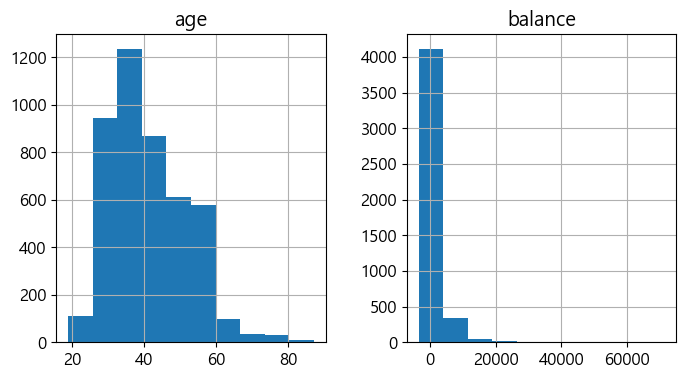

[상자그림]


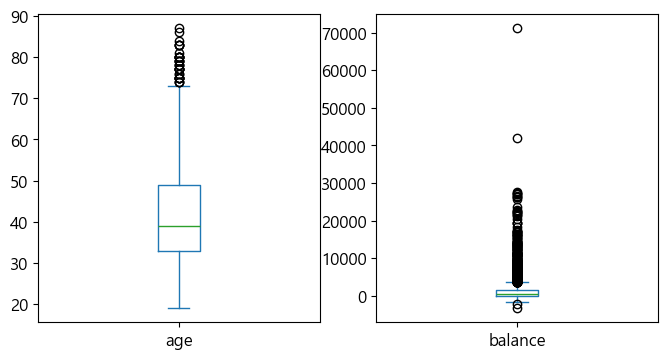

In [99]:
# 양적변수와 질적변수의 데이터 시각화 방법은 차이가 있기 때문에 아래와 같이 각각 시각화를 진행하고자 한다. 먼저 양적변수인 age, balance에 대하여, 히스토그램, 상자그림으로 시각화한 결과는 다음과 같다.
quan_feat = [feat for feat in df.columns if df[feat].dtypes== 'int64']

from matplotlib import pyplot as plt
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (8, 4)

# 히스토그램을 통해 두 변수 모두 데이터가 왼쪽으로 쏠려 있고, 오른쪽 꼬리를 가지는 데이터 분포임을 알 수 있다.
print("[히스토그램]")
df[['age','balance']].hist()
plt.show()

# 상자그림을 통해 두 변수 모두 이상치를 가지고 있음을 확인하였고, 특히 balance의 경우 극단적인 이상치가 관찰된다.
print("[상자그림]")
df[quan_feat].plot(kind='box', subplots=True)
plt.show()

[막대 그래프]


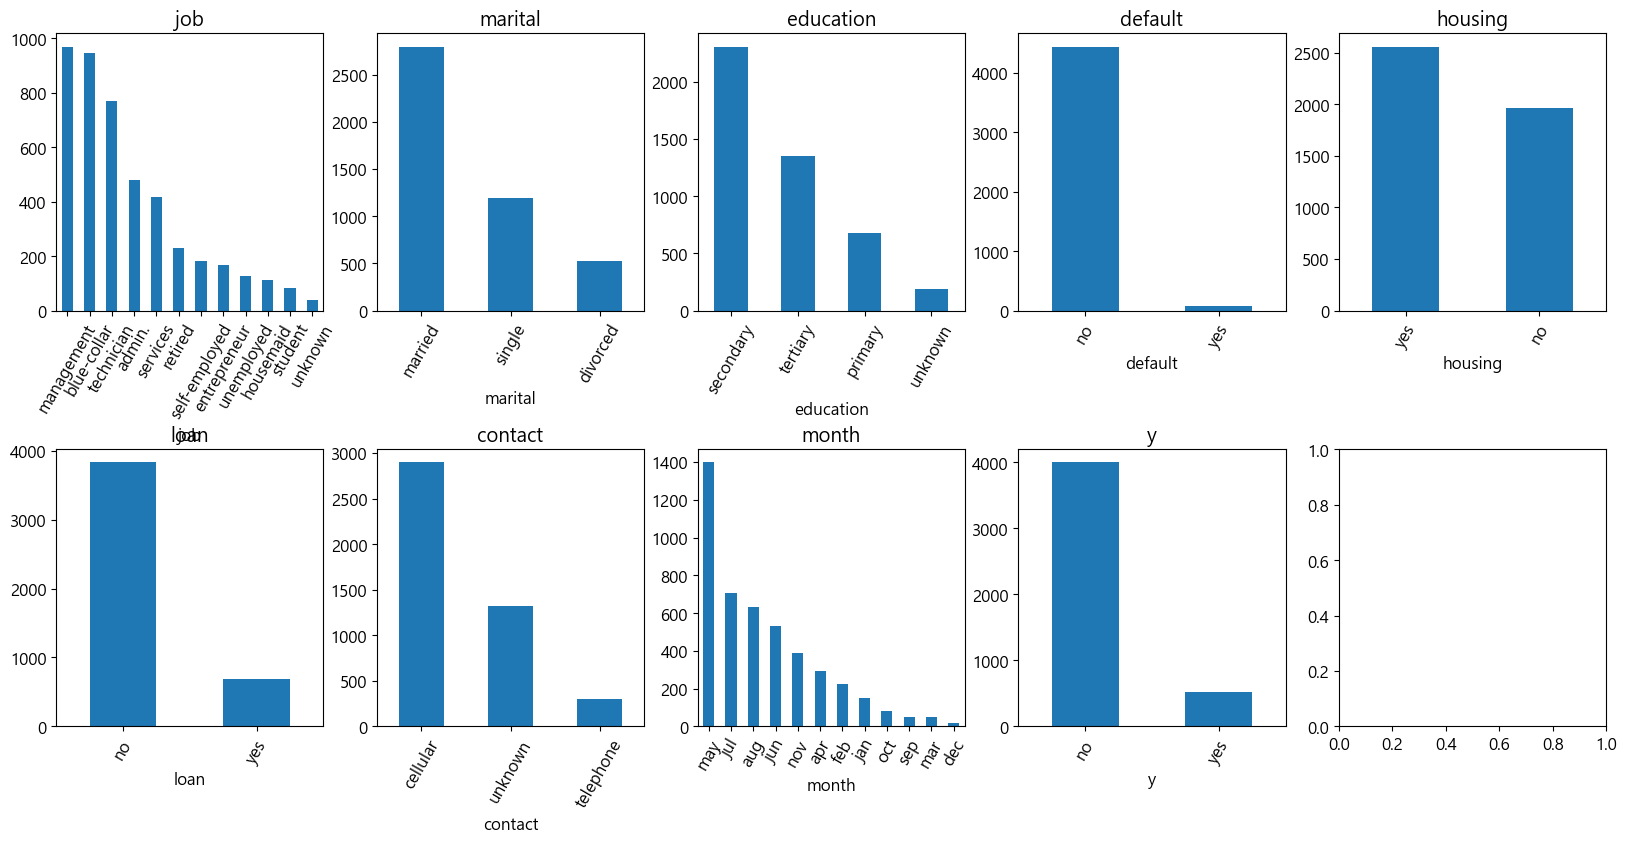

[파이 그래프]


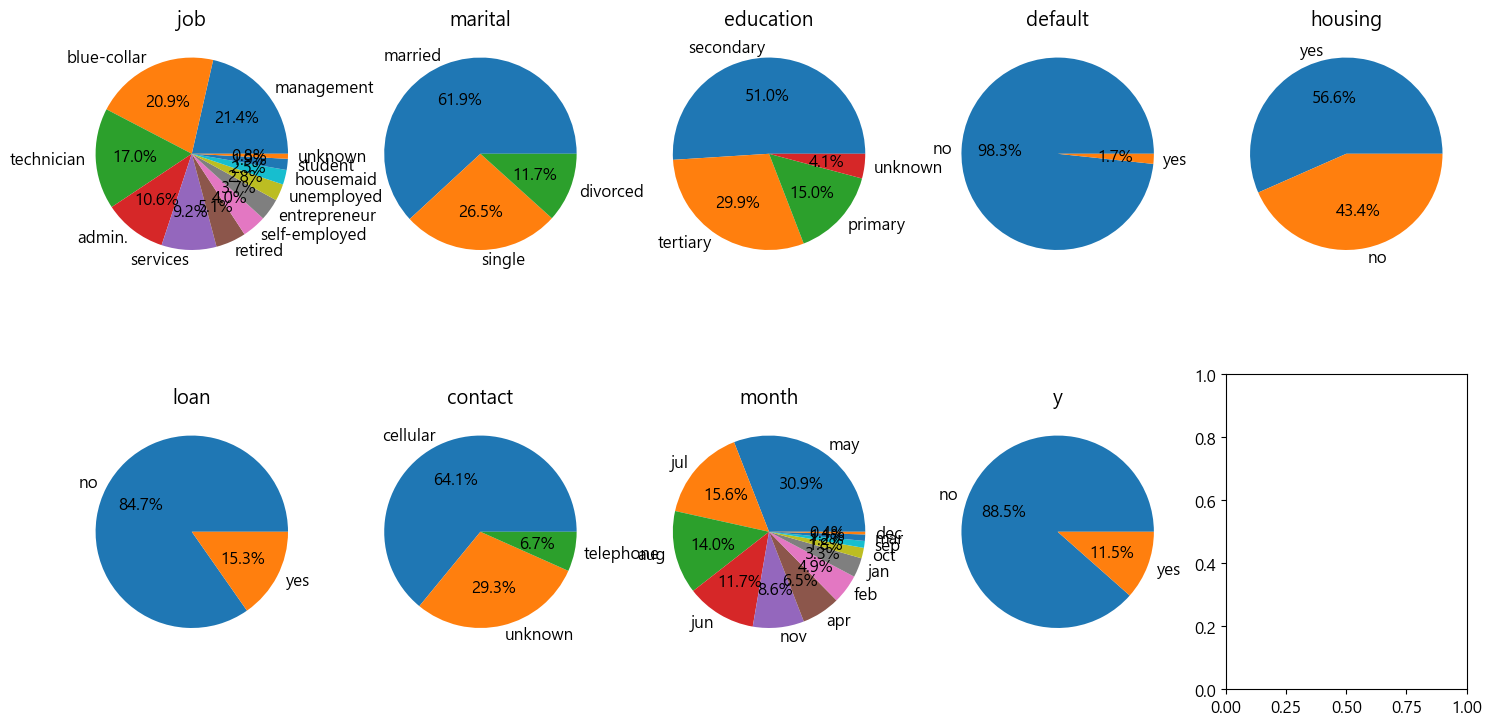

In [102]:
# 질적변수들은 막대 그래프와 파이 그래프로 시각화 할 수 있으며 그 결과는 다음과 같다. 막대그래프로 각 변수들의 범주의 빈도를 비교할 수 있고, 파이그래프로 범주가 차지하는 비율을 확인할 수 있다.
qual_feat = [feat for feat in df.columns if df[feat].dtypes== object]

print("[막대 그래프]")
fig, axes = plt.subplots(2,5, figsize=(20, 9))
plt.subplots_adjust(hspace=0.5)
for ax, feature in zip(axes.ravel(), qual_feat):
    ax.set_title(feature)
    df[feature].value_counts().plot.bar(ax=ax, rot=60)
plt.show()

from pandas import DataFrame
print("[파이 그래프]")
fig, axes = plt.subplots(2,5, figsize=(18, 9))
for ax, feature in zip(axes.ravel(), qual_feat):
    ax.set_title(feature)
    table = df[feature].value_counts()
    ax.pie(table.values, labels=table.index, autopct="%.1f%%")
plt.show()

#### 연습문제 #2

In [116]:
# 상승률은 기하평균으로 계산

from scipy.stats import gmean
import numpy as np
data = [0.04, 0.03, 0.05, 0.1, 0.08]
data = np.array(data)+1
a1 = gmean(data)-1
print("[라이브러리 계산] {:.4f}".format(a1))

a2 = (1.04*1.03*1.05*1.1*1.08)**(1/5)-1
print("[수기 계산] {:.4f}".format(a2))

[라이브러리 계산] 0.0597
[수기 계산] 0.0597


#### 연습문제 #3

In [114]:
# 속도는 조화평균으로 계산
from scipy.stats import hmean
import numpy as np
data = [5, 7]
a1 = hmean(data)
print("[라이브러리 계산] {:.4f}".format(a1))

a2 = 1/((1/5+1/7)/2)
print("[수기 계산] {:.4f}".format(a2))

[라이브러리 계산] 5.8333
[수기 계산] 5.8333


#### 연습문제 #4

In [117]:
Z_value_a = (210-200) / np.sqrt(49)
Z_value_b = (210-190) / np.sqrt(36)

print(Z_value_a, Z_value_b)

1.4285714285714286 3.3333333333333335


In [118]:
import numpy as np
hamburger = (210 - 200) / np.sqrt(49)
sandwich = (210 - 190) / np.sqrt(36)
print("햄버거 {:.2f}, 샌드위치 {:.2f}".format(hamburger, sandwich))

# 표준화한 점수로 두 개체의 무게를 비교해야 한다. 표준화 점수가 더 높은 샌드위치의 무게가 상대적으로 무겁다. 정답: 샌드위치

햄버거 1.43, 샌드위치 3.33


#### 연습문제 #5

In [119]:
A = 2 / 10
B = 1 / 8
print("A {:.2f}, B {:.2f}".format(A, B))
# 해당 문제는 두 학교의 상대적 산포도인 변동계수를 구하여 비교해야 한다. A학교의 변동계수가 더 크기 때문에 격차가 더 심하다고 볼 수 있다. 정답: A학교

A 0.20, B 0.12
